# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

# Problem Statement
In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. 
Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research 
aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type
and fare amount.

# Objective
This project main goal is to run A/B test to examine the relationship between the total fare and the method of payment.
We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate 
more cash.in particular, we want to find out if there is big difference in the fares for those who pay with credit card vs
those who pay with cash.

# Import the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
df=pd.read_csv('2020_Yellow_Taxi_Trip_Data.csv')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df1=pd.read_csv('2020_Yellow_Taxi_Trip_Data.csv')[0:800000]

In [5]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Data Exploration 

In [6]:
df1.shape

(800000, 18)

In [7]:
df1.dtypes

VendorID                  object
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID             float64
DOLocationID             float64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

# Data Wrangling

In [8]:
#Change the datatype of date time columns 
df1['tpep_pickup_datetime']=pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime']=pd.to_datetime(df1['tpep_dropoff_datetime'])

In [14]:
# Create trip duration column and 
df1['duration']=df1['tpep_dropoff_datetime']-df1['tpep_pickup_datetime']

# Convert duration data to actual minutes for better accuracy 
df1['duration']=df1['duration'].dt.total_seconds()/60

In [15]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [18]:
# Our main purpose is Hypothesis Testing on Payment type and Fare amount
# Extract the essential columns for analysis.
df1=df1[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [19]:
df1.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000


# Handling missing values

In [21]:
# Find the missing values
df1.isnull().sum()

passenger_count    1576
payment_type       1576
fare_amount           0
trip_distance         0
duration              0
dtype: int64

In [181]:
#percentage of the missing data to total reocrd of the data.
print('Missing data %:',round(1576/len(df1)*100,2))

Missing data %: 0.34


In [23]:
# Its 0.34% data of missing out of all dataset so we remove that because its not major effect of our accuracy 
df1.dropna(inplace=True)

# Data Exploration and Manipulation

In [24]:
df1

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
799995,1.0,1.0,11.0,2.47,12.816667
799996,1.0,1.0,17.5,4.24,21.150000
799997,1.0,1.0,8.5,1.88,8.600000
799998,1.0,1.0,9.5,2.15,9.583333


In [25]:
# Convert datatype of float to Integer 
df1['passenger_count']=df1['passenger_count'].astype('int64')
df1['payment_type']=df1['payment_type'].astype('int64')

In [26]:
# Check duplicate value
df1[df1.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2064,1,2,7.0,0.00,0.000000
2451,1,1,52.0,0.00,0.200000
2456,2,1,9.5,1.70,13.066667
2476,1,1,4.0,0.40,3.083333
3358,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
799992,4,1,5.5,0.80,4.850000
799993,2,1,5.0,0.72,4.983333
799995,1,1,11.0,2.47,12.816667
799997,1,1,8.5,1.88,8.600000


In [27]:
# lets remove the duplicates value from data 
df1.drop_duplicates(inplace=True)

In [28]:
df1.shape

(603662, 5)

In [29]:
# Check the disribution data Categorical and Numerical
df1['passenger_count'].value_counts()

passenger_count
1    364731
2    119121
3     38113
5     29373
4     22793
6     17551
0     11965
7         7
8         5
9         3
Name: count, dtype: int64

In [30]:
# Check the disribution data Categorical and Numerical
df1['payment_type'].value_counts()

payment_type
1    387204
2    209670
3      4276
4      2512
Name: count, dtype: int64

In [31]:
#filtering for passenger count from 1 to 5.
df1=df1[(df1['passenger_count']>0) & (df1['passenger_count']<6)]

#filtering for payment type 1 and 2. 
df1=df1[df1['payment_type']<3]

In [32]:
df1.shape

(567718, 5)

In [33]:
# replacing the pyment type encoded value 1 and 2 to Card and Cash. 
df1['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [36]:
df1.describe()

,passenger_count,fare_amount,trip_distance,duration
count,567718.000000,567718.000000,567718.000000,567718.000000
mean,1.666206,14.912550,3.768118,18.866262
std,1.101032,13.913997,4.557008,81.365826
min,1.000000,-110.000000,-9.290000,-2770.366667
25%,1.000000,7.000000,1.200000,7.300000
50%,1.000000,10.500000,2.100000,11.883333
75%,2.000000,16.500000,4.100000,18.383333
max,5.000000,1238.000000,259.220000,2458.400000


In [37]:
# we observed that negative value in fare amount, trip distance and duration its not possible, so we remove it
df1=df1[df1['fare_amount']>0]
df1=df1[df1['trip_distance']>0]
df1=df1[df1['duration']>0]

In [38]:
df1.describe()

,passenger_count,fare_amount,trip_distance,duration
count,562748.000000,562748.000000,562748.000000,562748.000000
mean,1.667507,14.753776,3.798259,18.883235
std,1.102102,13.349563,4.561863,81.112625
min,1.000000,0.010000,0.010000,0.016667
25%,1.000000,7.000000,1.210000,7.350000
50%,1.000000,10.500000,2.120000,11.916667
75%,2.000000,16.500000,4.120000,18.383333
max,5.000000,1238.000000,259.220000,2458.400000


<Axes: >

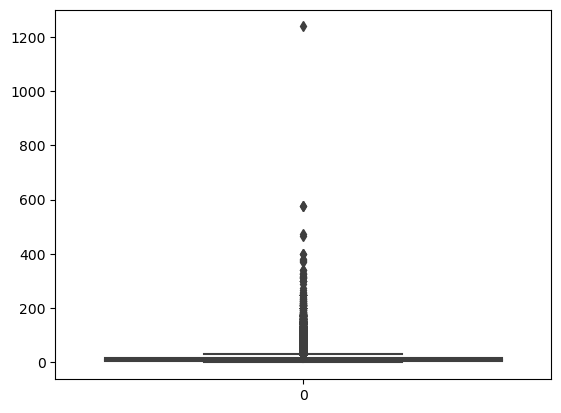

In [39]:
#Detect Outliers through boxplot
sns.boxplot(df1['fare_amount'])

<Axes: >

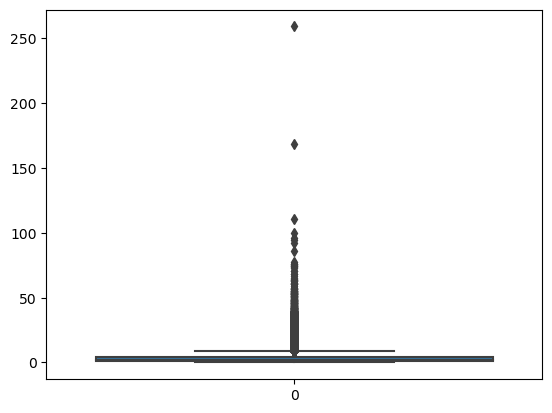

In [40]:
#Detect Outliers through boxplot
sns.boxplot(df1['trip_distance'])

<Axes: >

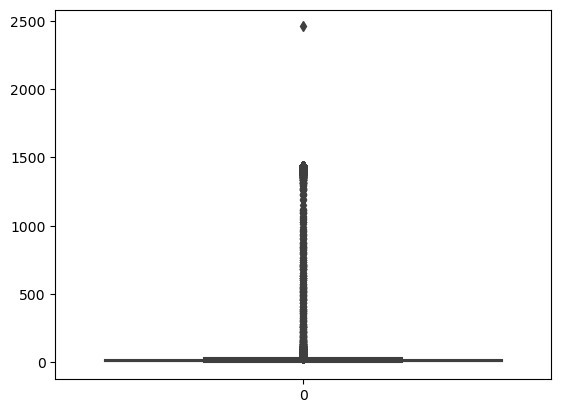

In [41]:
#Detect Outliers through boxplot
sns.boxplot(df1['duration'])

In [42]:
# Teated/Trimming Outlier thorugh IQR method
for col in ['fare_amount','trip_distance','duration']:
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    IQR=q3-q1
    
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    
    df1=df1[(df1[col]>=lower_limit) & (df1[col]<=upper_limit)]

In [43]:
df1

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
799988,1,Card,14.0,3.17,17.216667
799989,1,Cash,12.5,2.52,16.783333
799991,3,Card,12.5,2.85,14.983333
799994,1,Card,11.5,2.77,12.583333


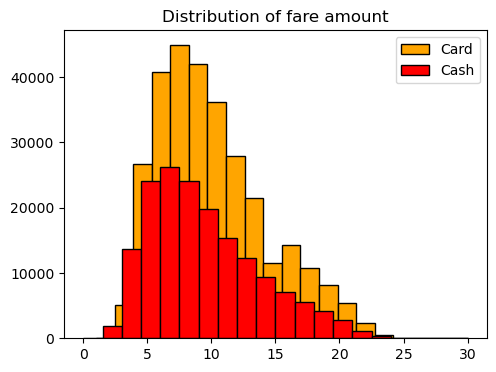

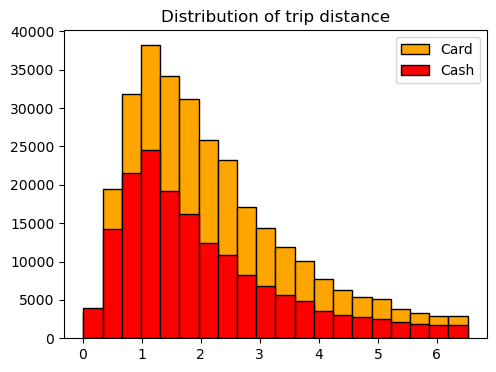

In [66]:
# Payment type according to fare amount & trip distance  distribution through visualization
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df1[df1['payment_type']=='Card']['fare_amount'],histtype='barstacked',bins=20,color='orange',edgecolor='k',label='Card')
plt.hist(df1[df1['payment_type']=='Cash']['fare_amount'],histtype='barstacked',bins=20,color='red',edgecolor='k',label='Cash')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df1[df1['payment_type']=='Card']['trip_distance'],histtype='barstacked',bins=20,color='orange',edgecolor='k',label='Card')
plt.hist(df1[df1['payment_type']=='Cash']['trip_distance'],histtype='barstacked',bins=20,color='red',edgecolor='k',label='Cash')
plt.legend()
plt.show()

In [67]:
# mean and std of trip distance and fare amount
df1.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']} )

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           10.123657  4.276359      2.198803  1.372263
Cash            9.717222  4.307285      2.041616  1.394662

:- Customers paying with cards tend to have a slightly higher average trip distance and fare amount 
   compared to those paying wth cash.
                       
:- Indicates that customers prefers to pay more with cards when they have high fare amount and long trip distance.

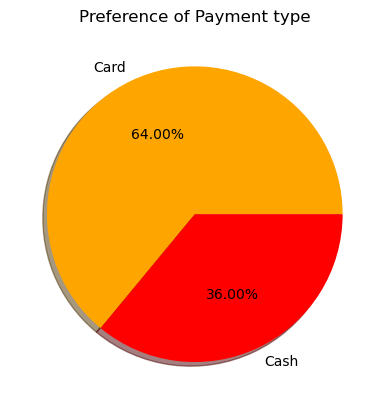

In [182]:
# Preference of Payment type visulize through Pie chart
plt.pie(df1['payment_type'].value_counts(),labels=df1['payment_type'].value_counts().index,autopct='%1.2f%%',colors=['orange','red'],shadow=True)
plt.title('Preference of Payment type')
plt.show()

:- The proportion of customers paying with cards is significantly higher than those paying with cash, with card payments    accounting for 64% of all transactions compared to cash payments at 34%. 

:- This indicates a strong preference among customers for using card payments over cash potentially due to convenience, security,or incentives offered for card transactions.

In [126]:
# We Group by Payment type and Passenger count by Payment mode
passenger_count=df1.groupby(['payment_type','passenger_count']).size().reset_index()
passenger_count.rename(columns={0:'count'},inplace=True)
passenger_count.reset_index(inplace=True)

In [133]:
# Add Percentage of Passenger count
passenger_count['Perc']=(passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,index,payment_type,passenger_count,count,Perc
0,0,Card,1,186622,40.062340
1,1,Card,2,63669,13.667891
2,2,Card,3,20222,4.341078
3,3,Card,4,10587,2.272722
4,4,Card,5,17050,3.660141
5,5,Cash,1,105433,22.633413
6,6,Cash,2,34043,7.308047
7,7,Cash,3,11688,2.509075
8,8,Cash,4,8237,1.768245
9,9,Cash,5,8278,1.777047


In [136]:
# Create custom Dataframe for Passenger Count better visulization
df2= pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df2['payment_type']= ['Card','Cash']
df2.iloc[0,1:]=passenger_count.iloc[0:5,-1]
df2.iloc[1,1:]=passenger_count.iloc[5:,-1]
df2

,payment_type,1,2,3,4,5
0,Card,40.06234,13.667891,4.341078,2.272722,3.660141
1,Cash,22.633413,7.308047,2.509075,1.768245,1.777047


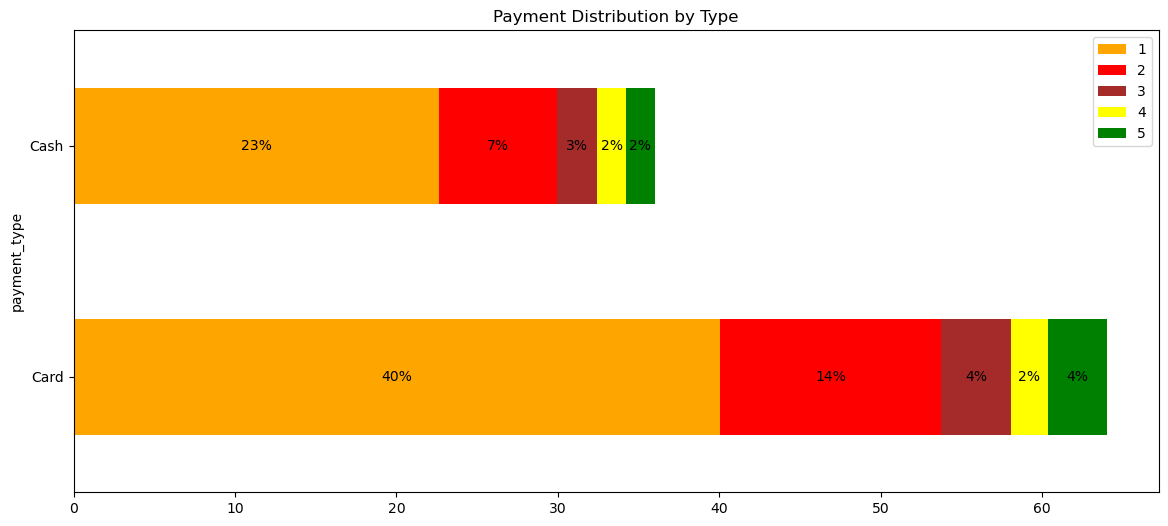

In [174]:
# visulization of passenger count analysis
fig,ax=plt.subplots(figsize=(14,6))
ax.set_title('Payment Distribution by Type') 
df2.plot(x='payment_type',kind='barh',stacked=True,ax=ax,color=['orange','red','brown','yellow','green'])

# add percentage text
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.text(x+width/2,
            y+height/2,
           '{:.0f}%'.format(width),
           horizontalalignment='center',
           verticalalignment='center')
    

:- Among card payments,rides with single passenger (No. of Passenger=1) comprise the largest propotion,
constituting 40% of all card transactions.

:- Similarly,cash payments are predominantly associated with single passenger rides,making up 23% of all cash transactions.

:- There is a noticeable decrease in the percentage of transactions as the passenger count increases.    


# Hypothesis Testing & Statistics Analysis

In [189]:
import numpy as np
import scipy.stats as stat
import pylab

In [185]:
# Check here to sample data is distributed normally or not?
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()

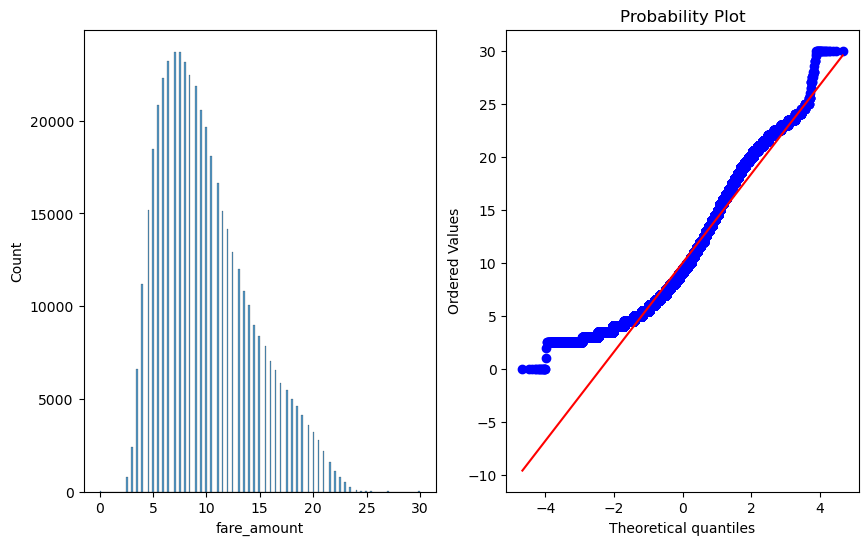

In [186]:
plot_data(df1['fare_amount'])

 We observed through Plot Sample data is not Normal distribution.so we consider T-test here on Sample data.

# T-Test


Null Hypothesis :- There is no difference in average fare between customers who use credit cards and customer who use cash.
    
Alternate Hypothesis :- There is a difference in average fare between customers who use credit cards and customer who use cash.

In [192]:
# Create Sample data for T-test
card_sample=df1[df1['payment_type']== 'Card']['fare_amount']
cash_sample=df1[df1['payment_type']== 'Cash']['fare_amount']

In [197]:
#Perform T-test on Sample data
t_tests,p_value=st.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)
print('T-statistics:', t_tests, 'p-value:',p_value)

T-statistics: 30.99215696134046 p-value: 1.3408460316570316e-210


In [198]:
# Significance value is 0.05 
if p_value < 0.05:   
    print(" We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

 We are rejecting null hypothesis


## Conclusion

:- We are rejecting null hypothesis.so we accept the alternate hypotheisis. 
    
:- Alternate Hypothesis :- There is a difference in average fare between customers who use credit cards and customer who use cash.  

:- with T-statistics: 30.99 and p-value of less than 0.05, we reject the null hypothesis, suggesting that there is indeed a significant difference in average fare between the two payment methods.

# Recommendations

:-  Encourage customers to pay with credit cards to capitalize on the potential for generating more revenue for taxi cab drivers.
    
:-  Implement strategies such as offering incentives or discounts for credit card transactions to incentivize customers to choose this payment method.
    
:-  Provide seamless and secure credit card payment options to enhance customer convenience and encouuragebadoption of this preferred payment method.    